# Sprint データセット作成

In [3]:
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.preprocessing import image
%matplotlib inline

## 【問題1】自作データセットでの分類の学習

In [4]:
path = './img_dog_cat/'
flist = os.listdir(path)

In [5]:
flist

['cat_1.jpg',
 'cat_2.jpg',
 'cat_3.jpg',
 'cat_4.jpg',
 'cat_5.jpg',
 'dog_5.jpg',
 'dog_4.jpg',
 'dog_1.jpg',
 'dog_3.jpg',
 'dog_2.jpg']

In [6]:
# glob を使用
img_list = glob.glob(path + '/*' + ".jpg")
img_list

['./img_dog_cat/cat_1.jpg',
 './img_dog_cat/cat_2.jpg',
 './img_dog_cat/cat_3.jpg',
 './img_dog_cat/cat_4.jpg',
 './img_dog_cat/cat_5.jpg',
 './img_dog_cat/dog_5.jpg',
 './img_dog_cat/dog_4.jpg',
 './img_dog_cat/dog_1.jpg',
 './img_dog_cat/dog_3.jpg',
 './img_dog_cat/dog_2.jpg']

In [7]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img.split("/")[-1]):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img.split("/")[-1]):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [8]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


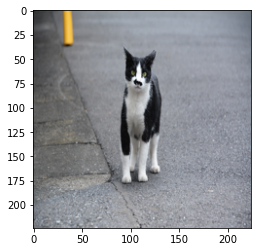

In [9]:
plt.imshow(cat_img_array[1])
plt.show()

In [10]:
import tensorflow as tf

x_train, x_test = np.concatenate([cat_img_array[:-1], dog_img_array[:-1]]), np.concatenate([cat_img_array[-1][np.newaxis], dog_img_array[-1][np.newaxis]])
y_train, y_test = np.array([0, 0, 0, 0, 1, 1, 1, 1]), np.array([0, 1])

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

print("loss: {}, acc: {}".format(*model.evaluate(x_test, y_test)))
print("predict = ", model.predict(x_test))
print("predict = ", np.argmax(model.predict(x_test), axis=1))

Epoch 1/30
1/1 [==============================] - 1s 610ms/step - loss: 0.6923 - accuracy: 0.7500
Epoch 2/30
1/1 [==============================] - 0s 192ms/step - loss: 0.6416 - accuracy: 0.8750
Epoch 3/30
1/1 [==============================] - 0s 199ms/step - loss: 0.5836 - accuracy: 0.8750
Epoch 4/30
1/1 [==============================] - 0s 198ms/step - loss: 0.4314 - accuracy: 0.7500
Epoch 5/30
1/1 [==============================] - 0s 191ms/step - loss: 0.3646 - accuracy: 0.8750
Epoch 6/30
1/1 [==============================] - 0s 195ms/step - loss: 0.3947 - accuracy: 0.8750
Epoch 7/30
1/1 [==============================] - 0s 193ms/step - loss: 0.2488 - accuracy: 1.0000
Epoch 8/30
1/1 [==============================] - 0s 204ms/step - loss: 0.3003 - accuracy: 0.8750
Epoch 9/30
1/1 [==============================] - 0s 201ms/step - loss: 0.2096 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 193ms/step - loss: 0.1655 - accuracy: 1.0000
Epoch 11/30
1/1 [==

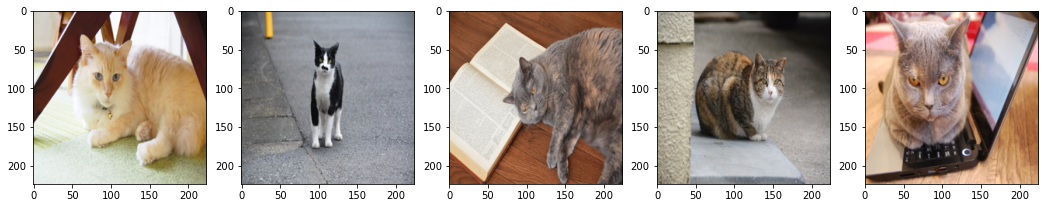

In [11]:
plt.figure(figsize=(18,8))
for i, img in enumerate(cat_img_array):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
plt.show()

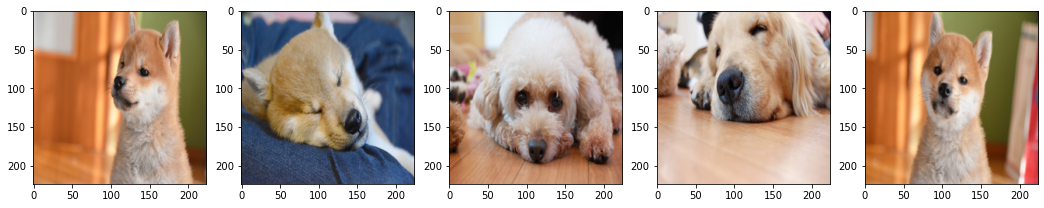

In [12]:
plt.figure(figsize=(18,8))
for i, img in enumerate(dog_img_array):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
plt.show()

## 【問題2】分類データセットに対するデータ拡張

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

def imageDataGenerator(img):
    
    result_img = np.empty((img.shape[0]*10, 224 ,224 ,3))
    
    # データ拡張のパターンを指定する
    glasses_gen = ImageDataGenerator(rotation_range    = 50,  ## 回転角度の変更域の指定
                               width_shift_range   = 0.3, ## 水平方向への移動域の指定
                               height_shift_range  = 0.3, ## 垂直方向への移動域の指定
                               shear_range         = 0.1, ## 傾斜角度の変更域の指定
                               zoom_range          = 0.3, ## 拡大率の変更域の指定
                               # channel_shift_range = 1, ## チャンネル変化の指定
                              )
    
    # ジェネレータを生成。
    gen = glasses_gen.flow(img, 
                     batch_size  = img.shape[0],
                    )
    plt.figure(figsize=(10,8)) # 表示画像サイズ
    
    count = 0
    # 画像を生成する
    for i in range(10):
        # ジェネレータにおけるイテレータを進める
        batches = next(gen)
        for j in range(batches.shape[0]):
            count +=1
            g_img = batches[j]
            plt.subplot(10, batches.shape[0], count)
            plt.imshow(g_img)
            plt.axis('off')
            result_img[count-1] = g_img
    # 表示
    plt.show()
    return result_img

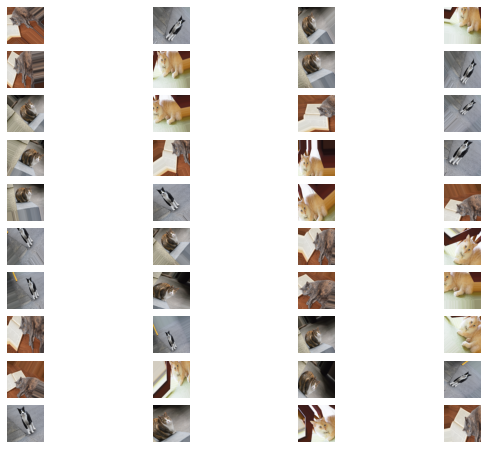

In [14]:
cat_img_array2 = imageDataGenerator(cat_img_array[:-1])

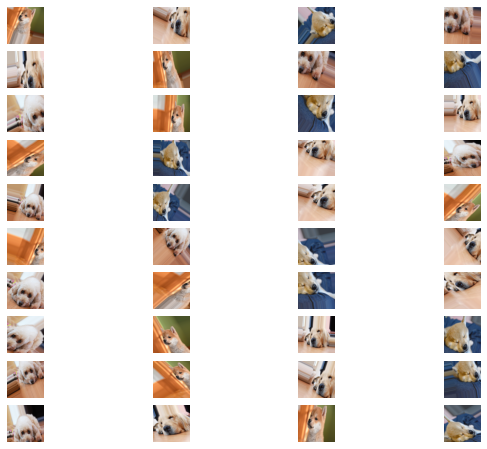

In [15]:
dog_img_array2 = imageDataGenerator(dog_img_array[:-1])

In [16]:
import tensorflow as tf

x_train = np.concatenate([cat_img_array2, dog_img_array2])
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                            0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                            1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                            1, 1, 1, 1, 1, 1, 1, 1, 1,1])

x_train = x_train / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

print("loss: {}, acc: {}".format(*model.evaluate(x_test, y_test)))
print("predict = ", model.predict(x_test))
print("predict = ", np.argmax(model.predict(x_test), axis=1))

Epoch 1/30
3/3 [==============================] - 1s 221ms/step - loss: 0.8104 - accuracy: 0.4258
Epoch 2/30
3/3 [==============================] - 1s 199ms/step - loss: 0.7226 - accuracy: 0.5523
Epoch 3/30
3/3 [==============================] - 1s 222ms/step - loss: 0.7179 - accuracy: 0.5062
Epoch 4/30
3/3 [==============================] - 1s 243ms/step - loss: 0.5997 - accuracy: 0.6937
Epoch 5/30
3/3 [==============================] - 1s 231ms/step - loss: 0.5808 - accuracy: 0.7641
Epoch 6/30
3/3 [==============================] - 1s 222ms/step - loss: 0.5286 - accuracy: 0.7625
Epoch 7/30
3/3 [==============================] - 1s 238ms/step - loss: 0.4947 - accuracy: 0.8102
Epoch 8/30
3/3 [==============================] - 1s 226ms/step - loss: 0.4833 - accuracy: 0.7789
Epoch 9/30
3/3 [==============================] - 1s 219ms/step - loss: 0.4370 - accuracy: 0.8086
Epoch 10/30
3/3 [==============================] - 1s 233ms/step - loss: 0.4390 - accuracy: 0.8352
Epoch 11/30
3/3 [==

データ拡張（水増し）したら精度が上がった（ほんの少しだけ。。）

## 【問題3】物体検出データセットの用意

In [17]:
!git clone https://github.com/tzutalin/labelImg.git

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [18]:
!pyrcc5 -o labelImg/libs/resources.py labelImg/resources.qrc

In [19]:
!python3 labelImg/labelImg.py labelImg/img_dog_cat

labelImg/labelImg.py:203: DeprecationWarning: an integer is required (got type DockWidgetFeatures).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  self.dock.setFeatures(self.dock.features() ^ self.dock_features)
Image:/Users/satouwataru/Desktop/DiveIntoCode/git/diveintocode-ml/splint/splint_18/labelImg/img_dog_cat/cat_2.jpg -> Annotation:/Users/satouwataru/Desktop/DiveIntoCode/git/diveintocode-ml/splint/splint_18/labelImg/img_dog_cat/cat_2.xml
Image:/Users/satouwataru/Desktop/DiveIntoCode/git/diveintocode-ml/splint/splint_18/labelImg/img_dog_cat/cat_1.jpg -> Annotation:/Users/satouwataru/Desktop/DiveIntoCode/git/diveintocode-ml/splint/splint_18/labelImg/img_dog_cat/cat_1.xml
Image:/Users/satouwataru/Desktop/DiveIntoCode/git/diveintocode-ml/splint/splint_18/labelImg/img_dog_cat/cat_3.jpg -> Annotation:/Users/satouwataru/Desktop/DiveIntoCode/git/diveintocode-ml/splint/splint_18/labelImg/img_dog_cat/cat_3.xml
Image:/Users/

In [22]:
import xml.etree.ElementTree as ET
#xmlデータを読み込みます
path = './img_dog_cat/xml/'
tree = ET.parse(path+'cat_1.xml')
#一番上の階層の要素を取り出します
root = tree.getroot()

In [23]:
print(root.tag)
print(root.attrib)

annotation
{}


In [24]:
for child in root:
    print(child.tag)
    print(child.attrib)

folder
{}
filename
{}
path
{}
source
{}
size
{}
segmented
{}
object
{}


In [27]:
!pip install -U albumentations

     |████████████████████████████████| 72 kB 1.2 MB/s eta 0:00:011
     |████████████████████████████████| 40.3 MB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 948 kB 37.6 MB/s eta 0:00:01
     |████████████████████████████████| 40.3 MB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 33.0 MB/s eta 0:00:01


In [28]:
import albumentations as A
import cv2
import random

In [29]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)


In [34]:
image = cv2.imread('./img_dog_cat/cat_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [64]:
bboxes = [[690, 186, 2308, 1795]]
category_ids = [1]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'dog', 1: 'cat'}

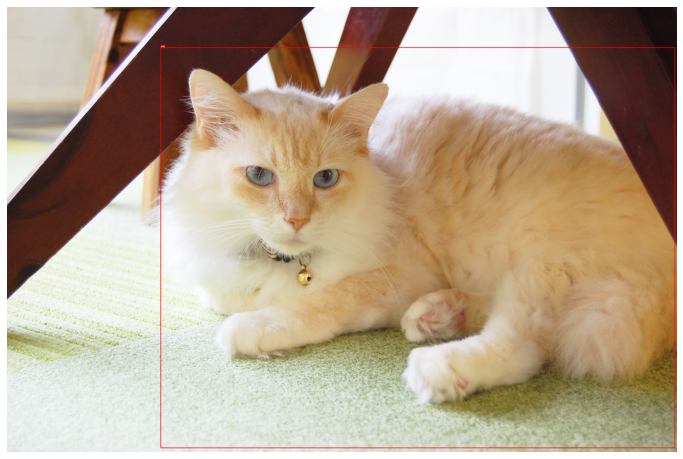

In [65]:
visualize(image, bboxes, category_ids, category_id_to_name)

In [66]:
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

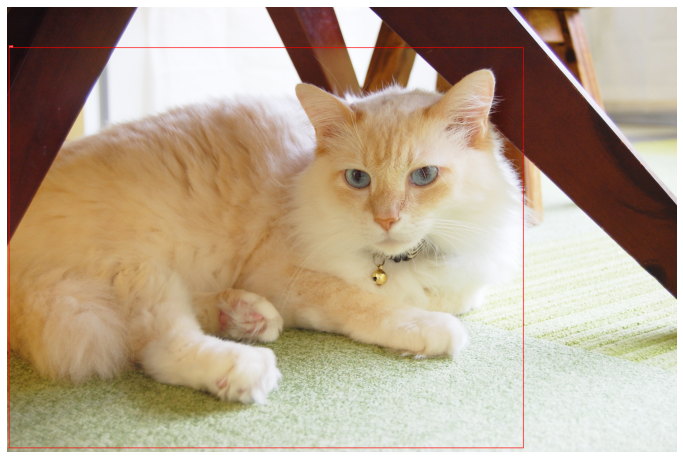

In [67]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [72]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

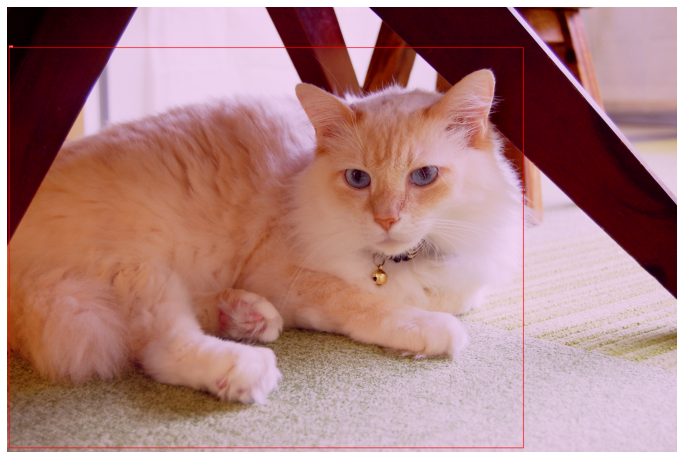

In [73]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)